# Almanik Balingga
## almanik.work@gmail.com

### Versi Library

Scipy : 1.6.2 <br>
Sklearn : 1.0

### Import Library

Sebelum memulai code, kita terlebih dahulu akan menyiapkan library yang nantinya digunakan pada Assignment ini. Adapun daftar library adalah sebagai berikut : numpy, pandas, matplotlib, seaborn, dan scikit-learn.

In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
# agar tidak muncul pesan warning, maka kita akan men-ignore 
import warnings
warnings.filterwarnings('ignore')

### Loading Data

Dataset yang akan digunakna adalah dataset Bank Marketing yang merupakan data panggilan marketing yang dilakukan oleh sebuah bank pada customernya.

Sebelumnya, kita akan meloading data menggunakna bantuan pandas, untuk delimiter kita akan gunakna ';' karena pada data tidak menggunakan tanda koma sebagai default delimiter, sehingga kita perlu mendifinisikannya.

In [2]:
df = pd.read_csv('dataset/bank-additional-full.csv',delimiter=';')

Setelah itu, kita akan mencoba melihat kondisi data kita dengan melihat lima baris data pertama.

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Kita juga bisa melakukan pengecekan tipe data pada tiap series di dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Setelah emmastikan tiap tipe data pada masing masing kolom, kita bisa memeriksa data yang memiliki missing values dengan menggunakan method *.isnull()* dan *.sum()*

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Data Preprocessing

Karena kita tahu beberapa data berbentuk kategorikal dan beberapa lagi berbentuk data numerik, maka kita akna membagi preprocessing ke dalam dua bagian.

### Kategorikal

Pertama tama kita akn mencoba untuk melakukan preprocessing pada data kategorikal. Untuk mencari kolom yang berbentuk kategorikal, kita akan melakukan looping dan melihat tipe data dari tiap kolom. Dari situ kita akan mendapatkan mana saja yang termasuk kategorikal. Pada tahap ini kita juga akan menyimpan data kolom yang berjenis numerik.

In [6]:
# variabel kolom
kategorikal = []
numerikal =[]
# looping untuk mencari kolom kategorikal dan numerik, dalam hal ini juga akan di print kolom kolom numerik
# beserta valuenya
for col in df.columns:
    if df[col].dtype == 'object':
        # append kolom kategorikal
        kategorikal.append(col)
        print(col," = ", df[col].unique())
        print()
    else:
        # append kolom numerikal
        numerikal.append(col)
    

job  =  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital  =  ['married' 'single' 'divorced' 'unknown']

education  =  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default  =  ['no' 'unknown' 'yes']

housing  =  ['no' 'yes' 'unknown']

loan  =  ['no' 'yes' 'unknown']

contact  =  ['telephone' 'cellular']

month  =  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week  =  ['mon' 'tue' 'wed' 'thu' 'fri']

poutcome  =  ['nonexistent' 'failure' 'success']

y  =  ['no' 'yes']



Selanjutnya kita akan coba visualisasikan bagaimana frekuensi persebaran data yang berjenis data kategorikal untuk tiap kelas "Yes" dan "No" di tiap kolom kategorikal.

#### Job

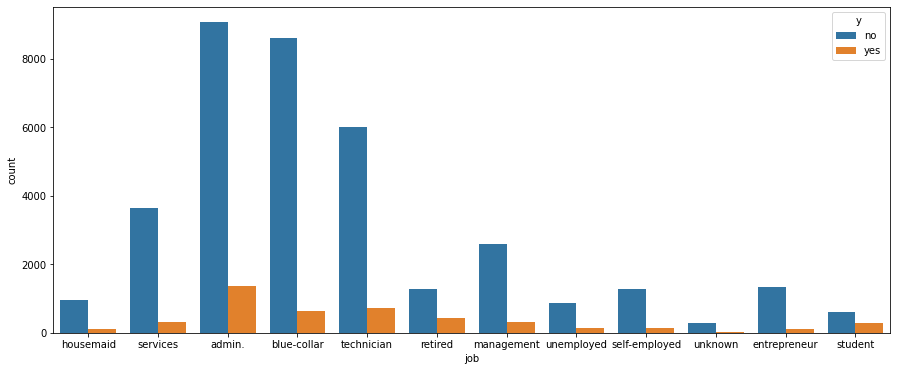

In [7]:
plt.figure(figsize=(15, 6))
# print(column.title())
ax = sns.countplot(x = df['job'], hue=df["y"])
plt.show()

Terlihat pada kolom job, banyak pekerjaan customer yang bekerja sebagai admin, blue collar, dan technician.

#### marital

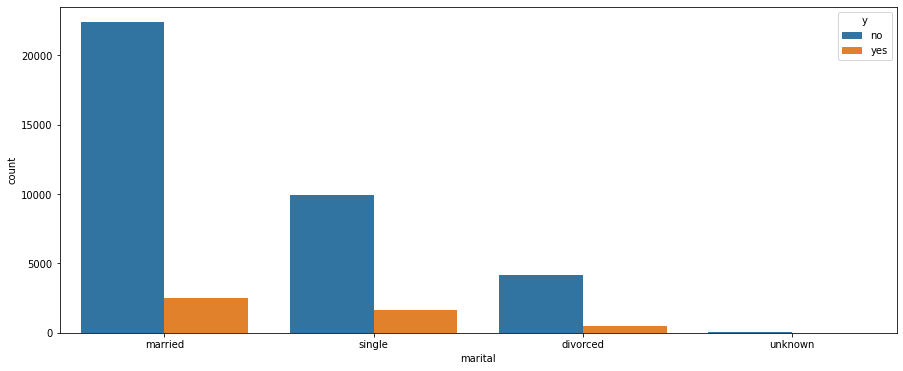

In [8]:
plt.figure(figsize=(15, 6))
# print(column.title())
ax = sns.countplot(x = df['marital'], hue=df["y"])
plt.show()

Pada kolom marital status, dominan pada customer yang sudah menikah.

#### education

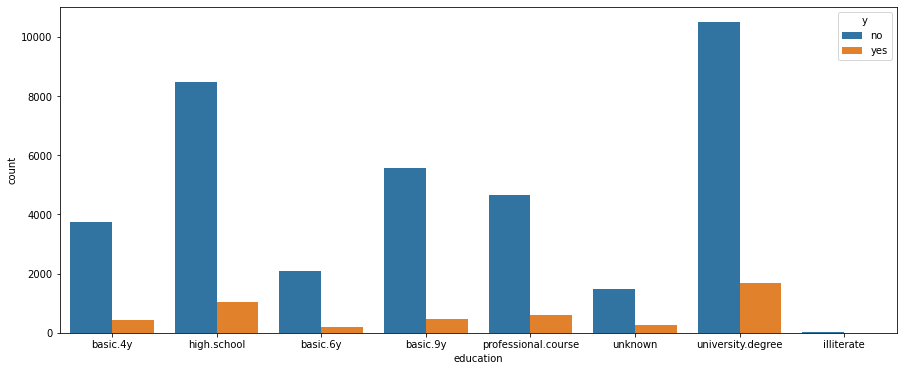

In [9]:
plt.figure(figsize=(15, 6))
# print(column.title())
ax = sns.countplot(x = df['education'], hue=df["y"])
plt.show()

Level pendidikan customer banyak di tingkat Universitas dan SMA.

#### default

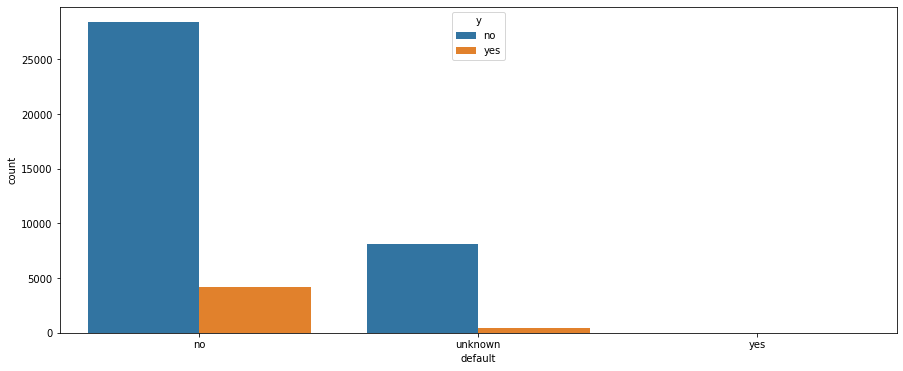

In [10]:
plt.figure(figsize=(15, 6))
# print(column.title())
ax = sns.countplot(x = df['default'], hue=df["y"])
plt.show()

Untuk kolom default karena banyak data mengarah ke no dan unknown, bahkan hampir semua. maka saya memilih untuk menghilangkan kolom default.

#### housing

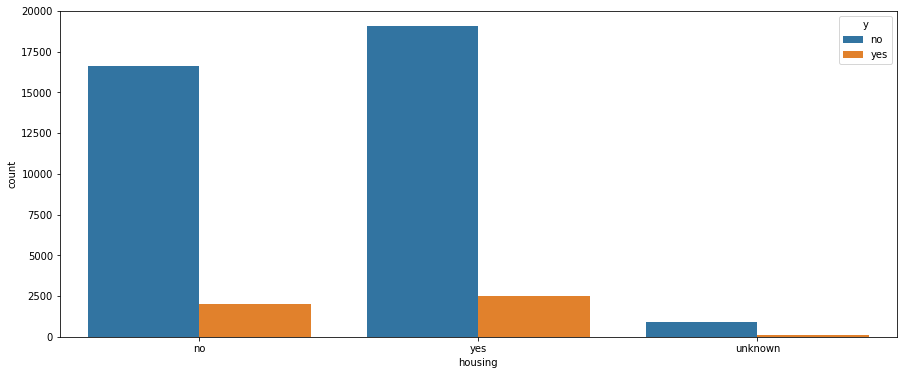

In [11]:
plt.figure(figsize=(15, 6))
# print(column.title())
ax = sns.countplot(x = df['housing'], hue=df["y"])
plt.show()

Untuk data housing sudah terlihat cukup baik.

#### loan

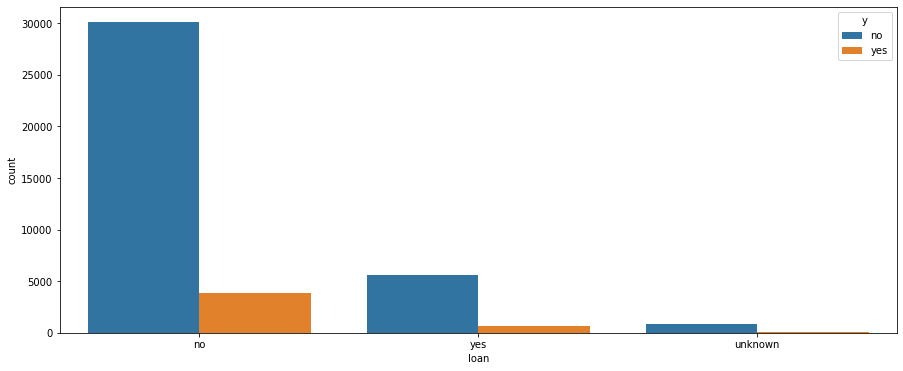

In [12]:
plt.figure(figsize=(15, 6))
# print(column.title())
ax = sns.countplot(x = df['loan'], hue=df["y"])
plt.show()

data loan terlihat cukup dominan pada no

#### contact

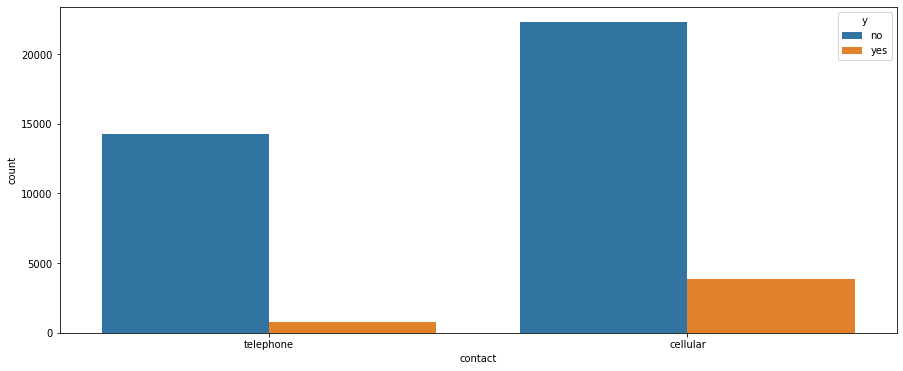

In [13]:
plt.figure(figsize=(15, 6))
# print(column.title())
ax = sns.countplot(x = df['contact'], hue=df["y"])
plt.show()

Untuk jenis kontak, tersebar secara hampir merata baik pada telephone maupun celular.

#### month

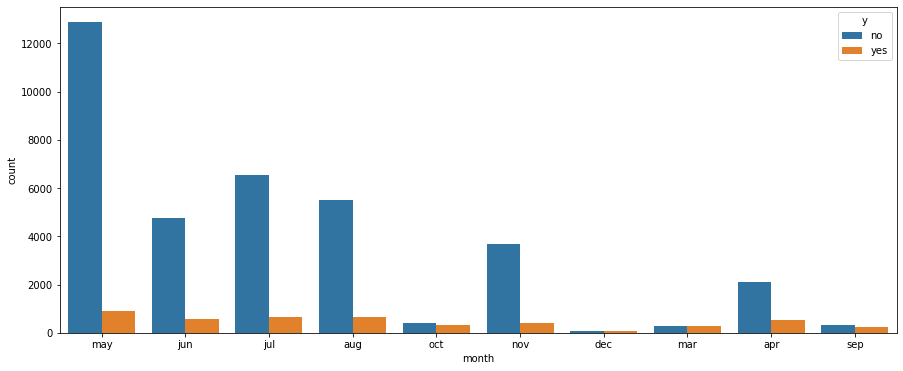

In [14]:
plt.figure(figsize=(15, 6))
# print(column.title())
ax = sns.countplot(x = df['month'], hue=df["y"])
plt.show()

Untuk bulan terlihat cukup fluktuatif dari jumlah panggilan, dan terlihat cukup banyak panggilan terjadi pada bulan mei, juni, juli, agustus, tetpai karena data berbasis pada panggilan yang dilakukan, maka data ini bagi saya terlihat kurang berarti. Sehingga saya memutuskan untuk menghilangkan data ini.

#### day_of_week

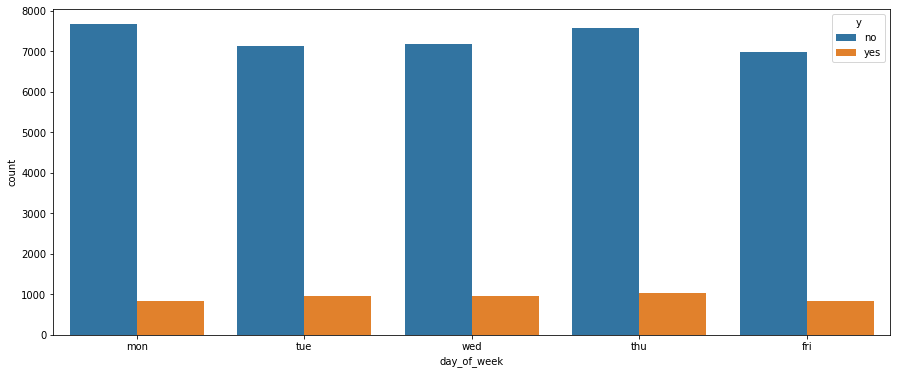

In [15]:
plt.figure(figsize=(15, 6))
# print(column.title())
ax = sns.countplot(x = df['day_of_week'], hue=df["y"])
plt.show()

Hampir sama alasannya dengan kolom bulan, kolom hari juag terlihat cukup stagnan, sehingga saya rasa hari tidak terlallu berpengaruh terhadap keputusan customer, hanya berpengaruh terhadap jumlah panggilan, akrena secara logika tiap harinya agen akan melakukan panggilan pada jumlah yang sama tiap harinya.

#### poutcome

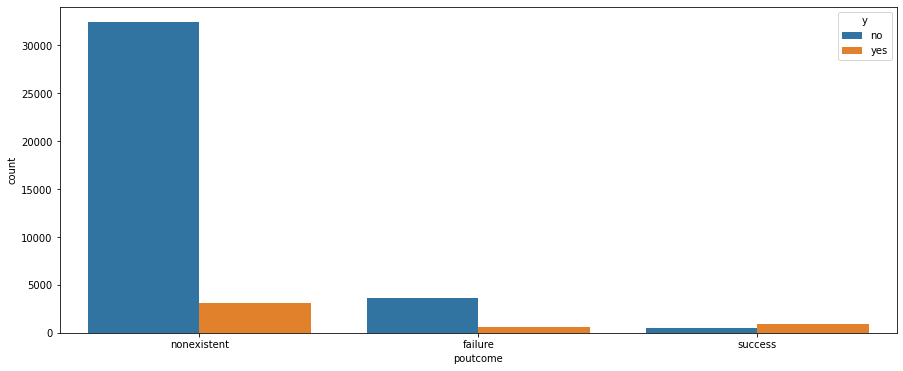

In [16]:
plt.figure(figsize=(15, 6))
# print(column.title())
ax = sns.countplot(x = df['poutcome'], hue=df["y"])
plt.show()

Untuk poutcome terlihat dominan pada nilai nonexistent.

#### y

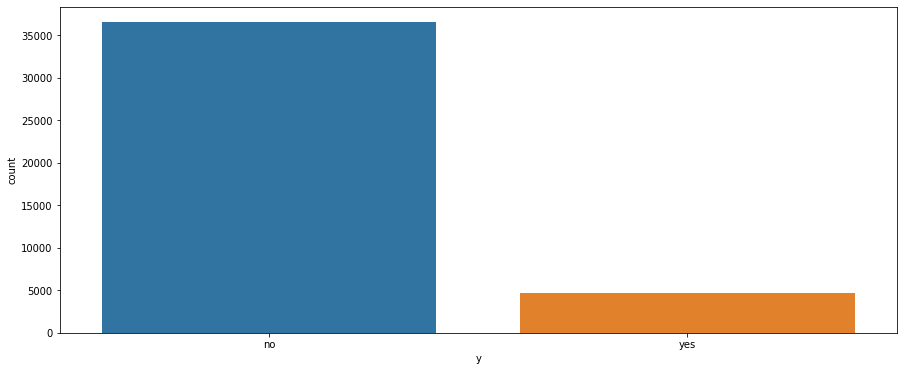

In [17]:
plt.figure(figsize=(15, 6))
# print(column.title())
ax = sns.countplot(df['y'])
plt.show()

dan untuk kolom y, terlihat dominan nilai pada kolom data bernilai no, sehingga dapat dikatakan data ini masih kurang seimbang, sehingga nantinya mungkin dapat mempengaruhi hasil prediksi.

Sesuai hasil analisis tadi, maka berikutnya kita akan melakukan drop untuk kolom yang dirasa itdak berperan banyak.

In [18]:
# drop yang tidak berpengaruh
df.drop(['default','day_of_week', 'month'], axis=1, inplace = True)

Lalu kita lakukan pengecekan pada data yang sudah dilakukan drop.

In [19]:
df.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Unknown Value

Pada data kategorikal, saya tidak mengganti value yang bernilai unknown, karena data tersebut dirasa dapat dianggap sebagai missing value, maka akan difilter.

In [20]:
df2 = df[(df['marital'] != 'unknown') ]
df2 = df2[(df2['housing'] != 'unknown')]
df2 = df2[(df2['loan'] != 'unknown')]

Kemudian kit pastikan apakah datanya sudah benar atau tidak

In [21]:
df.shape

(41188, 18)

In [22]:
df2.shape

(40119, 18)

karena kolom housing merupakan kolom yang merupakanmiliki unknown values, maka kan coba kita visualkan untuk melihat perbandingannya. Dan ternyata sudah tidak ada lagi nilai unknown.

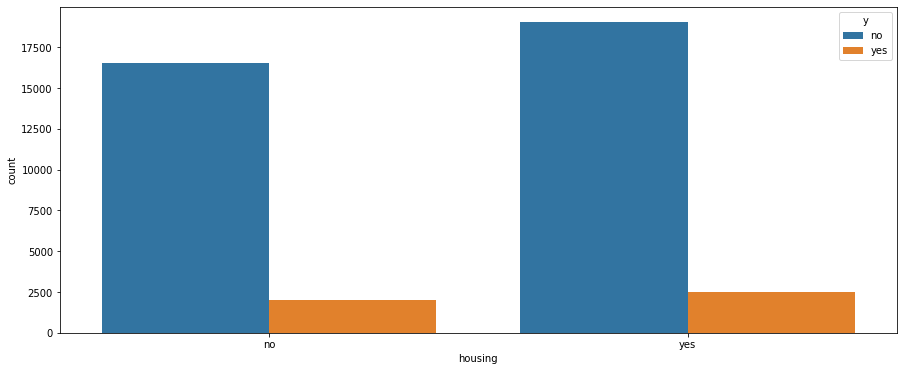

In [23]:
plt.figure(figsize=(15, 6))
# print(column.title())
ax = sns.countplot(x = df2['housing'], hue=df2["y"])
plt.show()

### Numerikal

Selanjutnya kita kana mengolah data yang bersifat numerikal. kita akan melihat terlebih dahulu kolom apa saja yang bernilai numerik.

In [24]:
numerikal

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

Selanjutnya kita coba memvisualisasikan bagaimana distribusi datanya menggunakan boxplot.

Age


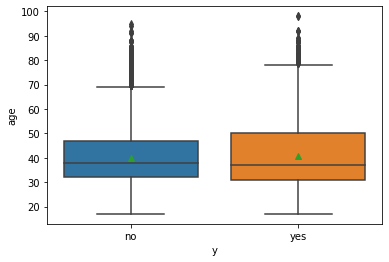

Duration


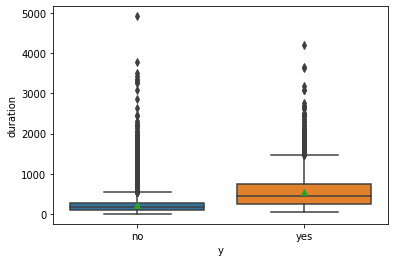

Campaign


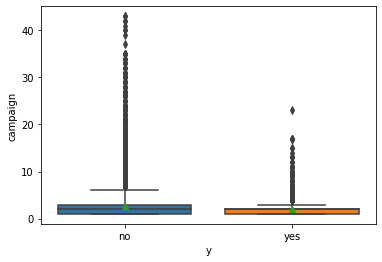

Pdays


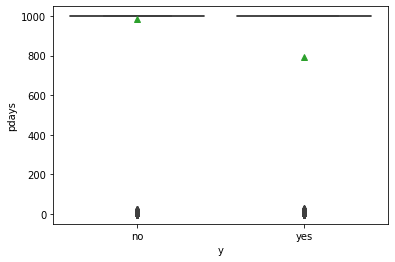

Previous


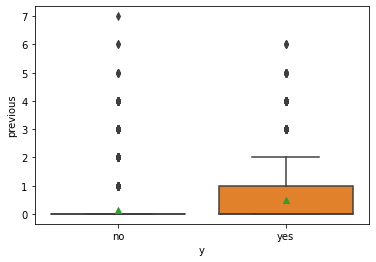

Emp.Var.Rate


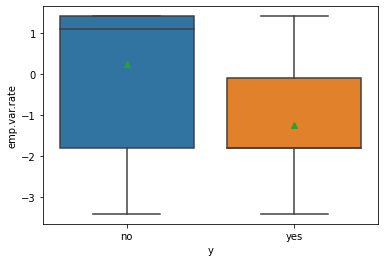

Cons.Price.Idx


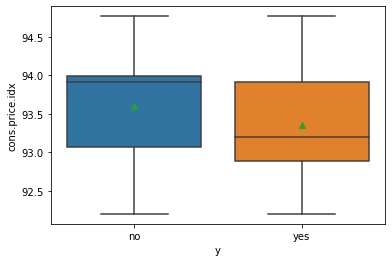

Cons.Conf.Idx


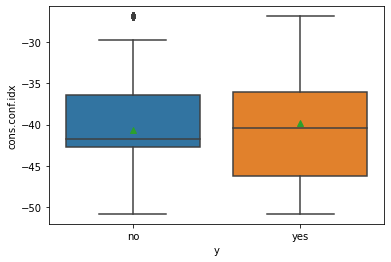

Euribor3M


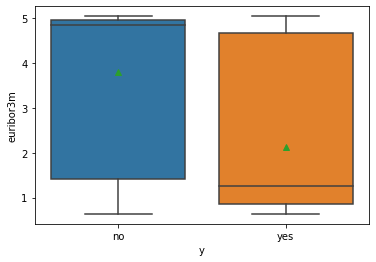

Nr.Employed


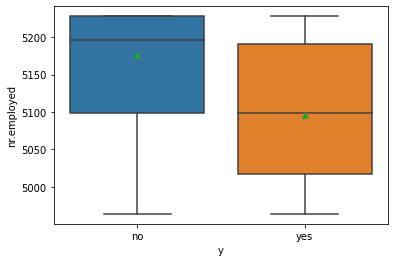

In [25]:
for num in numerikal:
    print(num.title())
    sns.boxplot(x = df2["y"], y = df2[num],showmeans=True)
    plt.show()

Beberapa insight yang dapat ditarik dari data numerik adalah sebagai berikut :
1. Umur customer baik yang menerima ataupun menolak campaign banyak di range 30- 50 tahun.
2. Durasi panggilan jika lebih lama makan berpeluang besar untuk sukses.
3. Campaign, semakin sering panggilan dilakukan untuk campaign yang sama pada satu customer, maka akan memperbesar peluang ditolak.
4. Terlihat customer yang sudah beberapa  kali di kontak lebih berpeluang menerima tawaran.
5. Customer yang pernah dikontak sebelumnya lebih banyak menerima camapign.

Selanjutnya karena kita ingin mebangun model yang salah satunya memperhatikan hubungan antar fitur, maka kita akna coba melihat korelasi antar fitur. 

In [26]:
df2[numerikal].corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000714,0.004105,-0.035883,0.025526,-0.001407,0.000327,0.129757,0.009745,-0.018924
duration,-0.000714,1.000000,-0.071441,-0.047528,0.019077,-0.026820,0.006630,-0.008777,-0.031276,-0.043034
campaign,0.004105,-0.071441,1.000000,0.052311,-0.079523,0.151265,0.128227,-0.014259,0.135574,0.144647
pdays,-0.035883,-0.047528,0.052311,1.000000,-0.587257,0.271521,0.079867,-0.092330,0.296820,0.371973
previous,0.025526,0.019077,-0.079523,-0.587257,1.000000,-0.420174,-0.203645,-0.050656,-0.453491,-0.499682
emp.var.rate,-0.001407,-0.026820,0.151265,0.271521,-0.420174,1.000000,0.774841,0.196982,0.972244,0.907120
cons.price.idx,0.000327,0.006630,0.128227,0.079867,-0.203645,0.774841,1.000000,0.059535,0.687631,0.521360
cons.conf.idx,0.129757,-0.008777,-0.014259,-0.092330,-0.050656,0.196982,0.059535,1.000000,0.278484,0.101482
euribor3m,0.009745,-0.031276,0.135574,0.296820,-0.453491,0.972244,0.687631,0.278484,1.000000,0.945235
nr.employed,-0.018924,-0.043034,0.144647,0.371973,-0.499682,0.907120,0.521360,0.101482,0.945235,1.000000


Atau jika divisualisasikan maka akakn berbentuk seperti berikut.

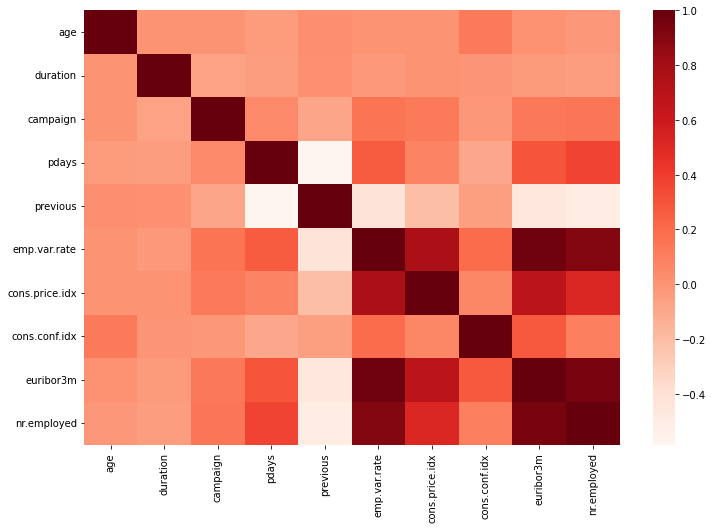

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df2[numerikal].corr(), cmap="Reds");

Ternyata data nr.employed, dan emp.var.rate memiliki korelasi positif yang cukup besar terhadap masing masing dan paling besar terhadap euribor3m, sehingga kita bisa menghilangkan dua kolom tersebut.

In [28]:
df2.drop(['nr.employed','emp.var.rate'], axis=1, inplace = True)

In [29]:
df2.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,telephone,261,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,no,no,telephone,149,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,yes,no,telephone,226,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,telephone,151,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,yes,telephone,307,1,999,0,nonexistent,93.994,-36.4,4.857,no


Selanjutnya kita akan update kolom kolom yang termasuk kedalam numerikal

In [30]:
numerikal =[]
for col in df2.columns:
    if df2[col].dtype != 'object':
        numerikal.append(col)

In [31]:
numerikal

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m']

### Encoding Categorical Value

Selanjutnya akan dilakukan encoding untuk variabel kategorikal. Untuk encoding sendiri, semua akan dilakukan menggunakan one hot encoding, karena yang dilakukan adalah call untuk marketing sehingga **berbeda** seperti kasus gaji karyawan yang berdasarkah hubungan antara variabel seperti jabatan, edukasi, dll. Hal tersebut tidak berlaku untuk kasus marketing seperti pada data di atas. <br>
Khusus Untuk kolom y akan dilakukan encoding berupa 0 untuk tidak dan 1 untuk ya.

In [32]:
#one hot encoding semua kategorikal
df3 = df2.copy()
#
df3['y'] = df3['y'].replace({'no':0, 'yes':1})
df3 = pd.get_dummies(df3)

Selanjutnya kita akan memeriksa dataset hasil encoding.

In [33]:
df3.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,job_admin.,...,education_unknown,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,1,0,0,1,0,1,0
1,57,149,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,1,0,0,1,0,1,0
2,37,226,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,1,1,0,0,1,0,1,0
3,40,151,1,999,0,93.994,-36.4,4.857,0,1,...,0,1,0,1,0,0,1,0,1,0
4,56,307,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,0,1,0,1,0,1,0


In [34]:
df3.shape

(40119, 41)

### Data Preparation for Modelling

Sebelum melakukan modelling, kita akan terlebih dahulu memberikan tratment untuk data karena seperti diketahui sebelumnya, data yang ada cukup tidak seimbang, karena proporsi kelas yes dan no tidak seimbang, dan hal itu tidak bagus untuk melakukan modelling. Karenanya kita akn coba menyeimbangkan data.

Terlebih dahulu kita siapkan data yang sudah dipisahkan antara fitur dan label.

In [35]:
df4 = df3.copy()
y_df5 = df4.pop('y')
df5 = df4

Kemudian kita periksa terlebih dahulu.

In [36]:
df5.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,...,education_unknown,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,1,0,0,1,0,1,0
1,57,149,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,1,0,0,1,0,1,0
2,37,226,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,1,1,0,0,1,0,1,0
3,40,151,1,999,0,93.994,-36.4,4.857,1,0,...,0,1,0,1,0,0,1,0,1,0
4,56,307,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,0,1,0,1,0,1,0


Setelah itu kila lakukan oversampling, yaitu menambah jumlah data, agar data yang kita miliki seimbang dan bisa digunakan dengan baik untuk melakukan modelling. Dalam hal ini kita akan menggunakan library imblearn atau imbalance learn.

In [37]:
#import library imblearn khususnya object SMOTE
from imblearn.over_sampling import SMOTE
#melakukan oversampling dengandata yang sudah ada.
oversample = SMOTE()
df6,y_df6 = oversample.fit_resample(df5,y_df5)

Kemudian data kita kembalikan ke bentuk semula.

In [38]:
df6['y'] = y_df6

Setelah itu kita periksa bentuk data kita saat ini.

In [39]:
df6.shape

(71196, 41)

dan kita coba periksa persebaran data kita berdasarkan labelnya.

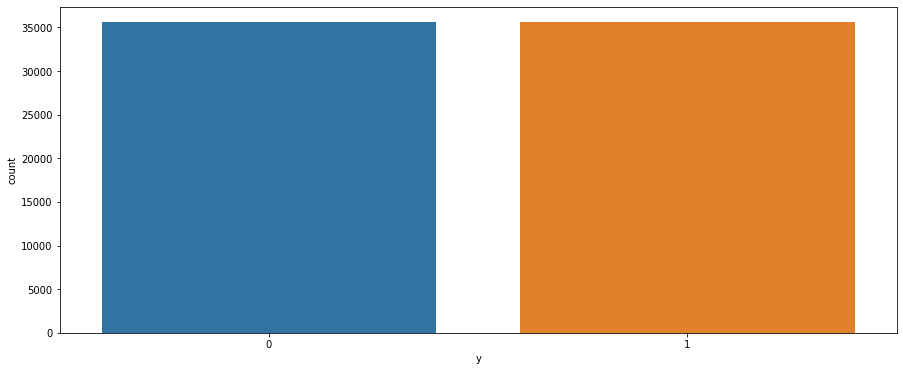

In [40]:
plt.figure(figsize=(15, 6))
# print(column.title())
ax = sns.countplot(df6['y'])
plt.show()

Data yang kita miliki sudah seimbang.

Selanjutnya kita akan melakukan train test split untuk membagi data ke dalam dua jenis data yaitu data test dan data train.

In [41]:
from sklearn.model_selection import train_test_split

Untuk pembagian data akan dibagi menjadi 80:20 untuk training dan testing.

In [42]:
df_train, df_test = train_test_split(df6, train_size = 0.8, random_state = 100)

Setelah itu, kita akan melakukan scaling data dengan menggunakan teknik standard scaler. untuk melakukannya kita akan menggunakan bantuan instace StandardScaler milik scikit-learn.

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

Setelah scaler didefisnisikan, selanjutnya kita akan melakukan fitting data training dan melakukan transform pada data testing.

In [45]:
df_train[numerikal] = scaler.fit_transform(df_train[numerikal])
df_test[numerikal] = scaler.transform(df_test[numerikal])

Langkah selanjutnya adalah memishakan fitur dan label baik pada data training maupun data testing.

In [46]:
y_train = df_train.pop('y')
X_train = df_train

In [47]:
y_test = df_test.pop('y')
X_test = df_test

In [48]:
# X_train[numerikal] = scaler.fit_transform(X_train[numerikal])

In [49]:
# X_test[numerikal] = scaler.transform(X_test[numerikal])

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((56956, 40), (56956,), (14240, 40), (14240,))

### Modelling

Pada tahap ini, kita akan mulai membuat model dan melakukan evaluasi terhadap model tersebut dengan cara menilai hasil prediksi dan melakukan hyperparameter tuning jika diperlukan.

#### NAIVE BAYES

Karena model ini merupakan model yang cukup sederhana, maka kita tidak akan melakukan hyperparameter tuning pada model ini.

In [51]:
from sklearn.naive_bayes import GaussianNB


modelNB = GaussianNB()


modelNB.fit(X_train,y_train)


predictedNB= modelNB.predict(X_test) 

Berikut adalah hasil classification report dari model tersebut :

In [52]:
print(metrics.classification_report(y_test, predictedNB))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      7019
           1       0.85      0.90      0.87      7221

    accuracy                           0.87     14240
   macro avg       0.87      0.87      0.87     14240
weighted avg       0.87      0.87      0.87     14240



In [53]:
print(metrics.confusion_matrix(y_test, predictedNB))

[[5876 1143]
 [ 741 6480]]


#### Logistic Regression

Untuk logistic regression akan dilakukan hyperparameter tunng dengan bantuan RandomizedSearchCV dengan CV =5 dan parameter yang diuji adalah penalty.

In [54]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(random_state=0, class_weight='balanced')

searchLR = RandomizedSearchCV(modelLR,{'penalty':['l2', 'l1']},cv=5)

bestLR = searchLR.fit(X_train,y_train)
print(bestLR.best_params_)
predictedLR= bestLR.predict(X_test) 



{'penalty': 'l2'}


Adapun hasil dari model tersebut adalah sebagi berikut :

In [55]:
print(metrics.classification_report(y_test, predictedLR))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7019
           1       0.97      0.92      0.95      7221

    accuracy                           0.95     14240
   macro avg       0.95      0.95      0.95     14240
weighted avg       0.95      0.95      0.95     14240



dengan hasil recall, presisi, dan f1-Score dari algoritma LR.

In [56]:
print(metrics.confusion_matrix(y_test, predictedLR))

[[6826  193]
 [ 544 6677]]


#### k-NN

Untuk k-NN akan dilakukan uji nilai k terbaik. dengan percobaan range k adalah dari 3 hingga 15 dengan mengambil angka ganjil saja. Hal ini dilakukan karena kelas hanya terdiri dari binary class saja.

In [57]:
from sklearn.neighbors import KNeighborsClassifier
resultknn = []
k_range = list(range(3, 16,2))
for k in k_range:
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    modelKNN.fit(X_train,y_train)
    predictedKNN= modelKNN.predict(X_test)
    resultknn.append(metrics.accuracy_score(y_test, predictedKNN))

Setelah kita melakukan iterasi terhadap tiap k yang didefinisikan, selanjutnya kita akan mencoba menampilkan grafik akurasinya.

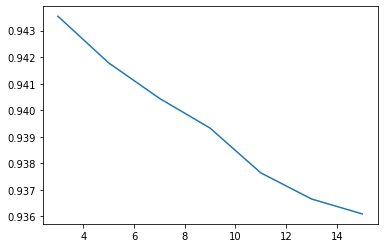

In [58]:
plt.plot(k_range,resultknn)
plt.show()
best_k = 0
for i in range(len(resultknn)):
    if resultknn[i] == max(resultknn):
        best_k = k_range[i]

In [59]:
print("Berdasarkan hasil training, terlihat bahwa nilai k terbaik adalah untuk k =", best_k)

Berdasarkan hasil training, terlihat bahwa nilai k terbaik adalah untuk k = 3


In [60]:
modelKNN = KNeighborsClassifier(n_neighbors=best_k)
modelKNN.fit(X_train,y_train)
predictedKNN= modelKNN.predict(X_test)
print(metrics.confusion_matrix(y_test, predictedKNN))

[[6571  448]
 [ 356 6865]]


dengan hasil recall, presisi, dan f1-Score dari algoritma k-NN.

In [61]:
print(metrics.classification_report(y_test, predictedKNN))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7019
           1       0.94      0.95      0.94      7221

    accuracy                           0.94     14240
   macro avg       0.94      0.94      0.94     14240
weighted avg       0.94      0.94      0.94     14240



#### Decision Tree

Untuk Decision Tree akan dilakukan hyperparameter tuning dengan bantuan RandomizedSearchCV dengan CV = 5 dan parameter yang diuji adalah criterion.

In [62]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier(random_state=2)

searchDT = RandomizedSearchCV(modelDT,{'criterion':['gini','entropy']},cv=5)

bestDT = searchDT.fit(X_train,y_train)
print(bestDT.best_params_)
predictedDT= bestDT.predict(X_test) 

{'criterion': 'entropy'}


dengan hasil recall, presisi, dan f1-Scoreserta confusion matrix  dari algoritma DT.

In [63]:
print(metrics.classification_report(y_test, predictedDT))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7019
           1       0.94      0.94      0.94      7221

    accuracy                           0.94     14240
   macro avg       0.94      0.94      0.94     14240
weighted avg       0.94      0.94      0.94     14240



In [64]:
print(metrics.confusion_matrix(y_test, predictedDT))

[[6573  446]
 [ 415 6806]]


#### Random Forest

Untuk Random Forest akan dilakukan hyperparameter tuning dengan bantuan RandomizedSearchCV dengan CV = 5 dan parameter yang diuji adalah criterion.

In [65]:
from sklearn.ensemble import RandomForestClassifier
modelRF=RandomForestClassifier(random_state=2)

searchRF = RandomizedSearchCV(modelRF,{'criterion':['gini','entropy']},cv=5)

bestRF = searchRF.fit(X_train,y_train)
print(bestRF.best_params_)
predictedRF= bestRF.predict(X_test) 

{'criterion': 'entropy'}


dengan hasil recall, presisi, dan f1-Scoreserta confusion matrix dari algoritma RF.

In [66]:
print(metrics.classification_report(y_test, predictedRF))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7019
           1       0.96      0.95      0.95      7221

    accuracy                           0.95     14240
   macro avg       0.95      0.95      0.95     14240
weighted avg       0.95      0.95      0.95     14240



In [67]:
print(metrics.confusion_matrix(y_test, predictedRF))

[[6733  286]
 [ 361 6860]]


#### SVM

Untuk SVM akan dilakukan hyperparameter tuning dengan bantuan RandomizedSearchCV dengan CV = 5 dan parameter yang diuji adalah kernel

In [68]:
from sklearn import svm 


modelSVC = svm.SVC(random_state=2) # Linear Kernel
searchSVC = RandomizedSearchCV(modelSVC,{'kernel':['linear', 'poly']},cv=5)

bestSVC = searchSVC.fit(X_train,y_train)
print(bestSVC.best_params_)
predictedSVC= bestSVC.predict(X_test) 

{'kernel': 'poly'}


dengan hasil recall, presisi, dan f1-Scoreserta confusion matrix dari algoritma SVM.

In [69]:
print(metrics.classification_report(y_test, predictedSVC))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7019
           1       0.97      0.92      0.95      7221

    accuracy                           0.95     14240
   macro avg       0.95      0.95      0.95     14240
weighted avg       0.95      0.95      0.95     14240



In [70]:
print(metrics.confusion_matrix(y_test, predictedSVC))

[[6809  210]
 [ 554 6667]]


### Kesimpulan

Berdasarkan analisis data dan proses pelatihan model, terdapat beberapa treatment yang dilakukan pada tahap preprocess diantaranya menghilangkan kolom default, month, dan day_of_week karena menurut saya kurang memiliki nilai untuk dimasukkan ke dalam model, faktor lainnya adalah karena data tersebut bersifat data penggilan yang dilakukan oleh pegawai bank shingga hasil data yang dipengaruhi oleh waktu kurang dapat menggambarkan data secara umum. Selain itu data numerikal yang dihilangkan adalah data nr.employeed dan emp.var.rate karena memiliki korelasi yang kuat dengan salah satu kolom. <br>
Selain itu dalam pemilihan model, karena tujuan dari pegawai bank adalah agar **dapat menelepon sebanyak mungkin customer dan menghasilkan kesepakatan 'deal'** pada campaign yang sedang dilakukan. Maka metriks evaluasi yang ditekankan adalah precision, dan recall dibanding akurasi. Dan berdasarkan evaluation metric tersebut model yang saya pilih adalah **Random Forest** dengan hasil evaluasi terbaik.